In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
import PIL
import cv2
import pickle

In [ ]:
from zipfile import ZipFile
file_name = "/content/Dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  zip.printdir()

File Name                                             Modified             Size
masked/000 (10).jpg                            2020-03-15 21:15:30        26099
masked/000 (11).jpg                            2020-03-15 21:15:30        33153
masked/000 (12).jpg                            2020-03-15 21:15:30        27679
masked/000 (13).jpg                            2020-03-15 21:15:30        23397
masked/000 (14).jpg                            2020-03-15 21:15:32        26804
masked/000 (15).jpg                            2020-03-15 21:15:32        21684
masked/000 (16).jpg                            2020-03-15 21:15:32        28707
masked/000 (17).jpg                            2020-03-15 21:15:32        36767
masked/000 (18).jpg                            2020-03-15 21:15:32        29844
masked/000 (19).jpg                            2020-03-15 21:15:32        28365
masked/000 (2).jpg                             2020-03-15 21:15:28        22563
masked/000 (20).jpg                     

In [ ]:
import pathlib
DIRECTORY = "/content/Dataset" 
CATEGORIES = ['masked','unmasked']
IMG_SIZE = 64 # IMG_SIZE = 224 alternative size 

X = []
y = []

def create_data():
    for category in CATEGORIES:
        path = DIRECTORY + "/" + category
        class_num_label = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
              img_array = cv2.imread(path+"/"+img, cv2.IMREAD_GRAYSCALE) #converts image pixel values into an array 
              img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
              X.append(img_array)
              y.append(class_num_label)
            except Exeption as e:
              pass           
create_data()

In [ ]:
X

[array([[220, 215, 209, ..., 144, 141, 141],
        [172, 168, 165, ..., 147, 145, 144],
        [210, 214, 216, ..., 226, 215, 205],
        ...,
        [106,  94, 112, ..., 140, 139, 126],
        [109, 110, 110, ..., 151, 165, 115],
        [108, 110, 115, ..., 105, 110, 111]], dtype=uint8),
 array([[ 89,  68,  73, ..., 208, 182, 186],
        [ 75, 103, 105, ..., 141, 120, 118],
        [ 98,  75,  65, ..., 135, 111, 108],
        ...,
        [185, 181, 158, ..., 145, 142, 140],
        [195, 202, 196, ..., 165, 162, 162],
        [226, 227, 201, ..., 154, 155, 159]], dtype=uint8),
 array([[114, 104, 106, ...,  62,  57,  47],
        [122, 103, 125, ...,  67,  57,  50],
        [155,  88,  89, ...,  70,  63,  56],
        ...,
        [ 14,  33,  48, ..., 188,  46,  49],
        [ 17,  24,  31, ..., 199, 189,  52],
        [ 15,  16,  16, ..., 188, 189,  95]], dtype=uint8),
 array([[159, 162, 156, ..., 145, 121, 141],
        [173, 171, 169, ..., 136, 114, 131],
        [179, 17

In [ ]:
SAMPLE_SIZE = len(y)
data = np.array(X).flatten().reshape(SAMPLE_SIZE, IMG_SIZE*IMG_SIZE) # pixel-features

# Turn X and y into numpy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE) # images
y = np.array(y) # target

print("Features, X shape: ", X.shape)
print("Target, y shape: ", y.shape)
print("Data shape: ", data.shape)

Features, X shape:  (3958, 64, 64)
Target, y shape:  (3958,)
Data shape:  (3958, 4096)


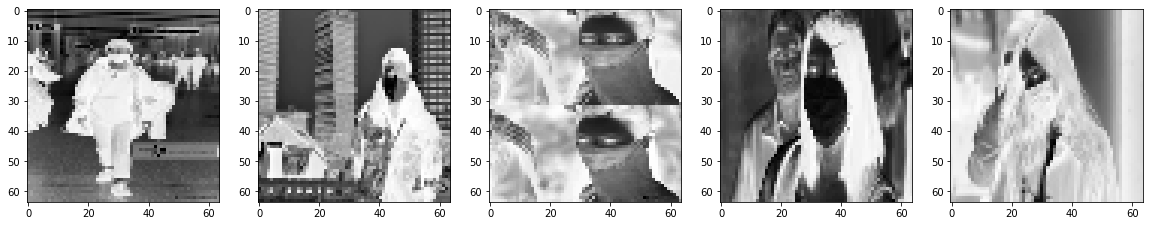

In [ ]:
import matplotlib.pyplot as plt # to plot inage, graph
%matplotlib inline

plt.figure(figsize=(20,10))
columns = 5
for i in range(5):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i],cmap=plt.cm.gray_r,interpolation='nearest')

In [ ]:
print('No.of Samples:', len(y))
print('No.of Without A Mask:', (y == 0).sum())
print('No.of With A Mask:', (y == 1).sum())

No.of Samples: 3958
No.of Without A Mask: 1388
No.of With A Mask: 2570


In [ ]:
X=X.reshape(3958,64*64)
X.shape

(3958, 4096)

In [ ]:
# Split our data into testing, training and validation.
X_train_new,X_test_new,Y_train_new,Y_test_new=train_test_split(X,y,test_size=0.3,random_state=42)
X_val_new,X_test_new,Y_val_new,Y_test_new=train_test_split(X_test_new,Y_test_new,test_size=0.1/0.3,random_state=42)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
parameters = {'n_neighbors':[1,3,9,15]}
GS_clf = GridSearchCV(KNeighborsClassifier(), parameters)
GS_clf.fit(X_val_new,Y_val_new)
GS_clf.best_params_

{'n_neighbors': 1}

In [ ]:
clf_01=KNeighborsClassifier(n_neighbors=1)
clf_01.fit(X_train_new, Y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred_01 = clf_01.predict(X_test_new)
accuracy_01 = clf_01.score(X_test_new, Y_test_new)
print("Accuracy %f" % accuracy_01)
metrics.accuracy_score(y_true=Y_test_new, y_pred=y_pred_01)

Accuracy 0.889169


0.889168765743073

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_new,y_pred_01))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80       133
           1       0.86      1.00      0.92       264

    accuracy                           0.89       397
   macro avg       0.92      0.84      0.86       397
weighted avg       0.90      0.89      0.88       397



In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf_01,X,y,cv=5)
print(scores.mean())

0.8739212606469244


In [ ]:
img_ = X_test_new[20]
img_.shape

(4096,)

In [ ]:
img_ = np.reshape(img_,(-1,4096))
img_.shape

(1, 4096)

In [ ]:
y_pred = clf_01.predict(img_)

In [ ]:
if y_pred==0:
  print("Masked")
else:
  print("Unmasked")

Unmasked


In [ ]:
original_index = Y_test_new[20]
if original_index==y_pred:
   print("Correct prediction")
else:
  print("Incorrect prediction")

Correct prediction


# **SVM**

In [ ]:
from sklearn import svm
from sklearn import metrics
parameters_00 = {'kernel':['rbf','linear','poly'],'C':[0.001, 0.1, 100, 10e5]}
GS_clf_00 = GridSearchCV(svm.SVC(), parameters_00)
GS_clf_00.fit(X_val_new,Y_val_new)
GS_clf_00.best_params_

{'C': 100, 'kernel': 'rbf'}

In [ ]:
model_00 = svm.SVC(C=100,kernel='rbf')
model_00.fit(X_train_new, Y_train_new)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model_00.predict(X_test_new)
accuracy = model_00.score(X_test_new, Y_test_new)
print("Accuracy %f" % accuracy)
metrics.accuracy_score(y_true=Y_test_new, y_pred=y_pred)

Accuracy 0.989924


0.9899244332493703

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       133
           1       1.00      0.99      0.99       264

    accuracy                           0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99      0.99      0.99       397



In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model_00,X,y,cv=5)
print(scores.mean())

0.9838307218838193


In [ ]:
y_pred1 = model_00.predict(img_)

In [ ]:
original_index = Y_test_new[20]
if original_index==y_pred1:
   print("Correct prediction")
else:
  print("Incorrect prediction")

Correct prediction


# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
parameters_10 = {'solver': ['lbfgs'], 'max_iter': [100,400,700,1000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15)}
GS_clf_10 = GridSearchCV(MLPClassifier(), parameters_10)
GS_clf_10.fit(X_val_new,Y_val_new)
GS_clf_10.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': 12, 'max_iter': 700, 'solver': 'lbfgs'}

In [ ]:
# clf_10=MLPClassifier(alpha=0.0001,hidden_layer_sizes=13,max_iter=1000,solver='lbfgs')
clf_10=MLPClassifier(alpha=0.1,hidden_layer_sizes=12,max_iter=700,solver='lbfgs')
clf_10.fit(X_train_new,Y_train_new)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=12, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=700,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred_10 = clf_10.predict(X_test_new)
accuracy_10 = clf_10.score(X_test_new, Y_test_new)
print("Accuracy %f" % accuracy_10)
metrics.accuracy_score(y_true=Y_test_new, y_pred=y_pred_10)

Accuracy 0.949622


0.9496221662468514

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_new,y_pred_10))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       133
           1       0.97      0.95      0.96       264

    accuracy                           0.95       397
   macro avg       0.94      0.95      0.94       397
weighted avg       0.95      0.95      0.95       397



In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf_10,X,y,cv=5)
print(scores.mean())

0.4476516109259472


In [ ]:
y_pred2 = clf_10.predict(img_)

In [ ]:
original_index = Y_test_new[20]
if original_index==y_pred2:
   print("Correct prediction")
else:
  print("Incorrect prediction")

Correct prediction
